In [6]:
from lida import Manager, llm, TextGenerationConfig

import pandas as pd
import os

lida = Manager(
    text_gen=llm('openai', api_key=os.getenv('OPENAI_API_KEY'))
)

textgen_config = TextGenerationConfig(
    n=3, temperature=0.5, model='gpt-3.5-turbo', use_cache=True
)

df = pd.read_csv('/Users/liuyang/Downloads/test.csv')
summary = lida.summarize(df)
goals = lida.goals(summary, n=2)

In [7]:
summary

{'name': '',
 'file_name': '',
 'dataset_description': '',
 'fields': [{'column': 'dataset',
   'properties': {'dtype': 'string',
    'samples': ['4pd-知识', '4pd-对话理解', '4pd-伦理道德'],
    'num_unique_values': 10,
    'semantic_type': '',
    'description': ''}},
  {'column': 'version',
   'properties': {'dtype': 'string',
    'samples': ['901d8f', '7144b4', '2db13b'],
    'num_unique_values': 10,
    'semantic_type': '',
    'description': ''}},
  {'column': 'metric',
   'properties': {'dtype': 'category',
    'samples': ['accuracy'],
    'num_unique_values': 1,
    'semantic_type': '',
    'description': ''}},
  {'column': 'mode',
   'properties': {'dtype': 'category',
    'samples': ['gen'],
    'num_unique_values': 1,
    'semantic_type': '',
    'description': ''}},
  {'column': '4pd/qwen-7b-chat@main',
   'properties': {'dtype': 'number',
    'std': 17.07505721480572,
    'min': 50.0,
    'max': 100.0,
    'samples': [66.67],
    'num_unique_values': 7,
    'semantic_type': '',
    '

In [8]:
goals

[Goal(index=0, question='What is the distribution of dataset', visualization='bar chart of dataset', rationale='This will show the frequency of each dataset in the data'),
 Goal(index=1, question='What is the distribution of version', visualization='bar chart of version', rationale='This will show the frequency of each version in the data')]

In [9]:
from lida.datamodel import Goal
my_goal = Goal(
    index=0,
    question='这个模型在各个方面的效果如何？',
    visualization='柱状图',
    rationale='可以全面展示各个方面的效果',
)

In [10]:
charts = lida.visualize(summary=summary, goal=my_goal, library='matplotlib', return_error=True)

In [11]:
len(charts)

1

11 11


<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.10/site-packages/matplotlib/pyplot.py'>

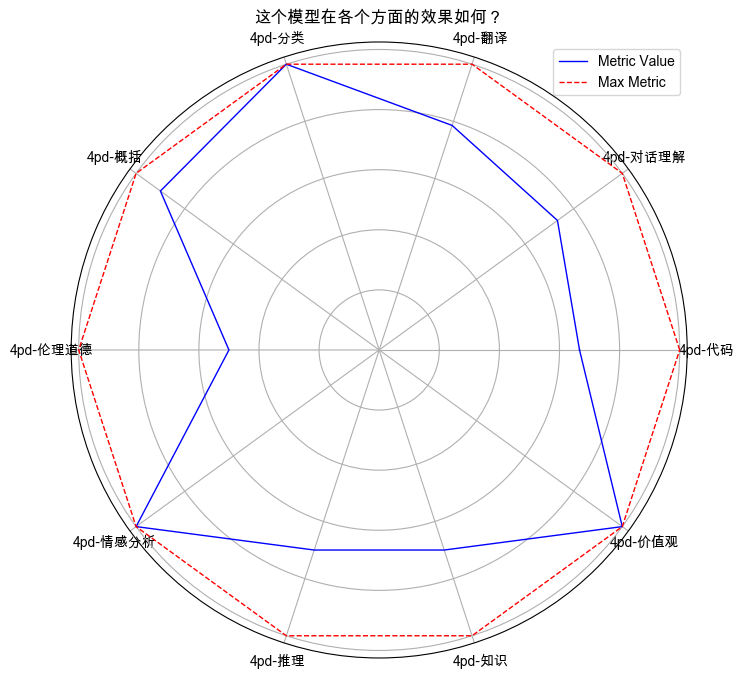

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# plan -
def plot(data: pd.DataFrame):
    # Transform the 'dataset' column to categorical type
    data['dataset'] = pd.Categorical(data['dataset'])

    # Create a list of unique datasets
    datasets = data['dataset'].unique()

    # Create a list of metric values for each dataset
    metric_values = []
    for dataset in datasets:
        metric_values.append(data[data['dataset'] == dataset]['4pd/qwen-7b-chat@main'].values[0])
    metric_values.append(metric_values[0])

    # Calculate the maximum metric value
    max_metric = max(metric_values)

    # Create a list of angles for the radar chart
    angles = [n / float(len(datasets)) * 2 * 3.14159 for n in range(len(datasets))]
    angles += angles[:1]

    # Create the radar chart
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(datasets)
    ax.set_yticklabels([])

    # Plot the metric values
    print(len(angles), len(metric_values))
    ax.plot(angles, metric_values, linewidth=1, linestyle='solid', color='blue', label='Metric Value')

    # Add a line for the maximum metric value
    ax.plot(angles, [max_metric] * len(angles), linewidth=1, linestyle='dashed', color='red', label='Max Metric')

    # Add a legend
    ax.legend(loc='upper right')

    plt.title('这个模型在各个方面的效果如何？', wrap=True)
    return plt

plot(df)

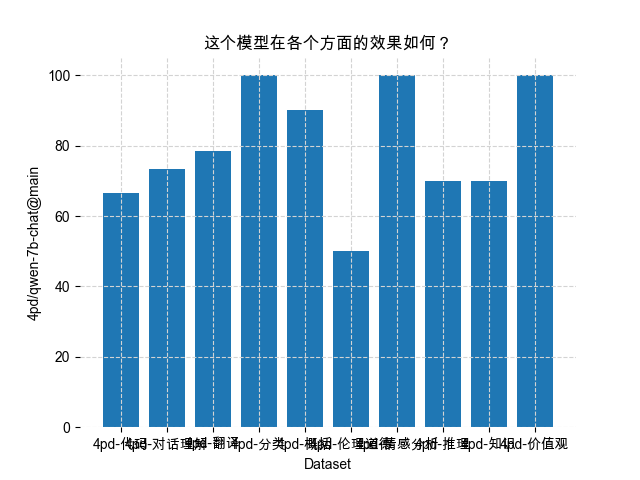

In [14]:
charts[0]

In [15]:
# modify chart using natural language
instructions = ["把x轴的坐标倾斜45度，以便清楚阅读较长度文本"]
edited_charts = lida.edit(code=charts[0].code,  summary=summary, instructions=instructions, library='matplotlib',
                         textgen_config=textgen_config)


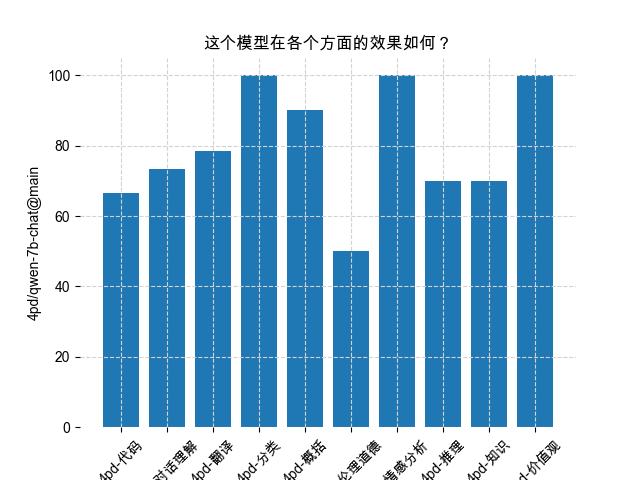

In [16]:
edited_charts[0]

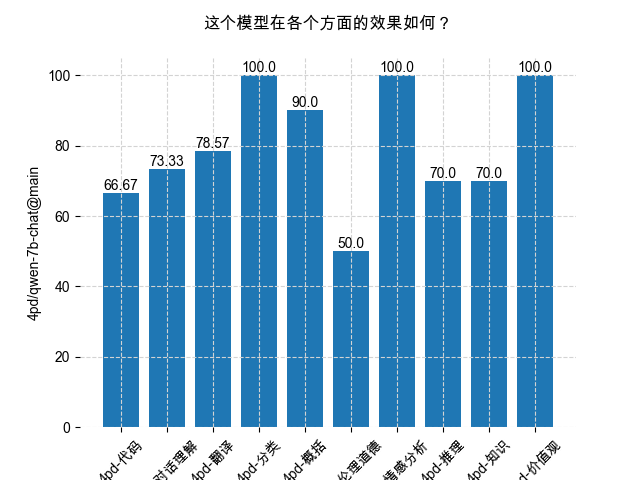

In [18]:
instructions = ["在每一个柱子上面加上数值标签"]
edited_charts = lida.edit(code=edited_charts[0].code,  summary=summary, instructions=instructions, library='matplotlib',
                         textgen_config=textgen_config)
edited_charts[0]

In [19]:
type(edited_charts[0])

lida.datamodel.ChartExecutorResponse